In [1]:
#Raw Image → Cleaning → Enhancement → Feature Extraction → Result

In [2]:
import cv2

In [3]:
img=cv2.imread('sample.jpg')

In [4]:
cv2.imshow('Original Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img.shape

(350, 642, 3)

# Cleaning

In [6]:
resized = cv2.resize(img, None,fx=0.5,fy=0.5, interpolation=cv2.INTER_LINEAR)

In [7]:
cv2.imshow('Resized Image',resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


In [9]:
cv2.imshow('RGB Image',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [11]:
cv2.imshow('Grayscale Image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# Contrast Enhancement using Histogram Equalization
equalized = cv2.equalizeHist(gray)

In [13]:
cv2.imshow('Contrast Enhanced Image',equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

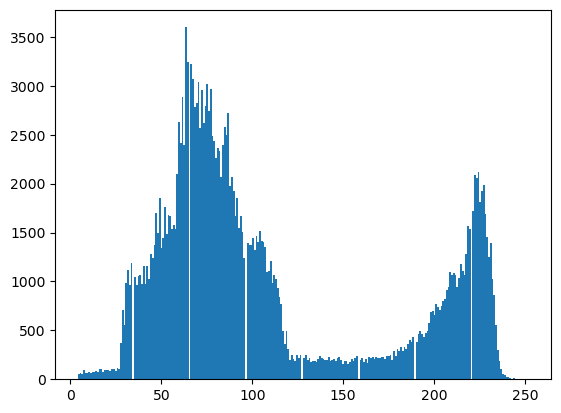

In [14]:
# noise guessing
import matplotlib.pyplot as plt
plt.hist(gray.ravel(), 256)
plt.show()


| Histogram pattern        | Noise         |
| ------------------------ | ------------- |
| High spikes at 0 & 255   | Salt & Pepper |
| Wide smooth distribution | Gaussian      |

In [15]:
#Filter Response Comparison
gauss = cv2.GaussianBlur(gray, (5,5), 0)
median = cv2.medianBlur(gray, 5)

In [16]:
import numpy as np

g_diff = np.mean(cv2.absdiff(gray, gauss))
m_diff = np.mean(cv2.absdiff(gray, median))


In [17]:
gaussian=1

In [18]:
if m_diff < g_diff:
    print("Salt & Pepper Noise")
    gaussian=0
else:
    print("Gaussian Noise")
    gaussian=1


Gaussian Noise


In [19]:
if(gaussian):
    h, w = gray.shape
    k = int(min(h, w) * 0.01)

    # odd number make panna
    if k % 2 == 0:
        k += 1

    denoised = cv2.GaussianBlur(gray, (k, k), 0)
else:
    denoised = cv2.medianBlur(gray, 5)

In [20]:
cv2.imshow('Denoised Image',denoised)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
diff = cv2.absdiff(gray, denoised)

In [22]:
cv2.imshow("Removed Noise", diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(denoised)

In [24]:
cv2.imshow("Denoised & Enhanced Image", enhanced)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
edges = cv2.Canny(enhanced, 50, 150)


In [26]:
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()